In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#number of steps
N_x, N_y = 100, 100

#total range -- starts at (0, 0)
x_max, y_max = 10, 10

#size of each step
dx = x_max / N_x
dy = y_max / N_y

In [3]:
#get the potential given the three charges given
def get_phi(x, y):    
    r1 = [2.0001, 3.0001]
    r2 = [6.0001, 3.0001]
    r = [r1, r2]

    #charges on each wire
    q1 = 2
    q2 = -2
    q = [q1, q2]
    
    #calculate the new phi at each points
    phi = 0
    for i in range(2):
        phi += q[i] * np.log((x - r[i][0])**2 + (y - r[i][1])**2) / 2
    return phi

In [4]:
#define an array and axes
phi_start = np.zeros((N_y + 1, N_x + 1))
X = np.zeros(N_x + 1)
Y = np.zeros(N_y + 1)
Y[0] = 0
Y[N_y] = y_max

for x in range(0, N_x + 1):
    #set values for the X axis
    X[x] = x * dx
    #compute the potentials at edges
    phi_start[0, x] = get_phi(x * dx, 0)
    phi_start[N_y, x] = get_phi(x * dx, y_max)
for y in range(1, N_y):
    #set values for the Y axis
    Y[y] = y * dy
    #compute the potentials at edges
    phi_start[y, 0] = get_phi(0, y * dy)
    phi_start[y, N_x] = get_phi(x_max, y * dy)

In [7]:
#max iterations
N_max = 15001

#minimum error
epsilon = 4.334284592200674e-27

#number of iterations
N = 0

#current error (set to high number)
delta = 100

#relaxation factor
alpha = 1.9

#stores current phi array
phi = np.copy(phi_start)

#stores what next phi array will be (used if alpha != 1)
phi_new = np.zeros((N_y + 1, N_x + 1))

#while error is too high or haven't done enough iterations
while (delta > epsilon) and (N < N_max):
    #set current error to zero
    delta = 0
    
    #create new phi
    phi_old = np.copy(phi)
    
    #for each item in the range
    for x in range (1, N_x):
        for y in range (1, N_y):
            #approximate new value of phi given surroundings
            phi_new[y, x] = 0.25 * (phi[y, x + 1] + phi[y, x - 1] + phi[y + 1, x] + phi[y - 1, x])
            
            #use relaxation factor if necessary
            phi[y, x] += alpha * (phi_new[y, x] - phi[y, x])
            
            #calculate error
            delta += (phi[y, x] - phi_old[y, x])**2
            
    #increment N
    N += 1

#calculate Phi = Phi_0 - Phi_R
phi_total = np.zeros((N_y + 1, N_x + 1))
for x in range(0, N_x + 1):
    for y in range(0, N_y + 1):
        phi_total[y, x] = phi[y, x] - get_phi(x * dx, y * dy)
        
#print necessary values
print("N =", N, "delta =", delta)

N = 1519 delta = 4.23178827145581e-27


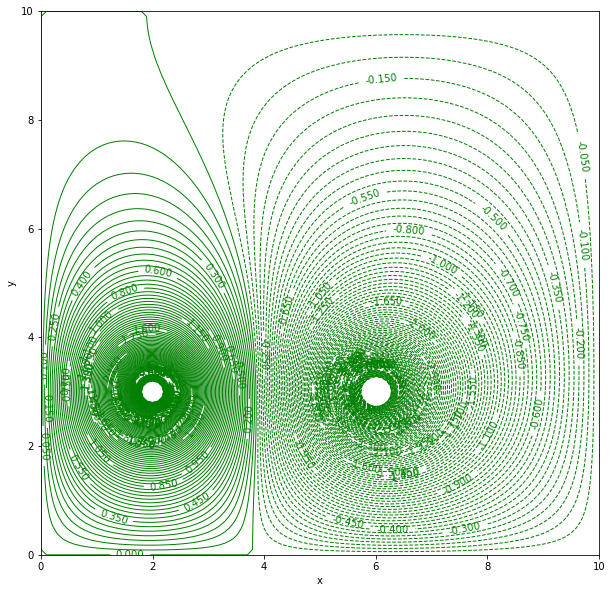

In [6]:
#how many countours you want
N_c = 200

#minimum potential
c_start = -5

#maximum potential
c_end = 5

#change in each potential step
dc = (c_end - c_start) / N_c

#create a countour set and define it from c_start to c_end
c_level = np.zeros(N_c + 1)
for c in range(0, N_c + 1):
    c_level[c] = c_start + c * dc

#plot it!
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.contour(X, Y, phi_total, levels=c_level, colors='g', linewidths=1).clabel()
ax.set_xlabel('x')
ax.set_ylabel('y')

#plot on next page
plt.show()